## -------------------------------------------------------------------------------------------------------------------------------

## BigMart_Outlet Sales Analysis and Predictions

BigMart's team of data scientists has gathered sales data for 1,559 products sold across ten different stores in various cities during 2013. They have also identified certain attributes of each product and store. The primary objective of this project is to develop a predictive model capable of estimating the sales of each product at a given outlet. By leveraging this model, BigMart aims to gain insights into the properties of products and stores that significantly impact sales. It is worth noting that the data may contain missing values as some stores may not report all the data due to technical issues. As a result, it will be necessary to address these gaps in the data. 

The dataset comprises two parts: a training dataset (8,523 records) with both input and output variables, and a test dataset (5,681 records) that needs to be used to predict the sales for each product.

## Hypothesis Generation 

Store level Hypothesis

    City type: Sales may be higher in urban or Tier 1 cities due to the higher income levels of people living in those areas.
    Population density: Stores located in densely populated areas may have higher sales due to greater demand.
    Store capacity: Larger stores may have higher sales as they provide customers with a one-stop shopping experience.
    Competitors: Stores located near similar establishments may have lower sales due to increased competition.
    Marketing: Stores with a strong marketing division may have higher sales as they can attract customers through targeted offers and advertising.
    Location: Stores located in popular marketplaces may have higher sales due to better access to customers.
    Customer behavior: Stores that stock products tailored to local customer needs may have higher sales.
    Ambiance: Well-maintained stores managed by friendly staff may have higher foot traffic and, therefore, higher sales.
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

Product level Hypothesis

    Brand: Branded products may have higher sales due to the customer's higher level of trust.
    Packaging: Products with appealing packaging may attract more customers and sell more.
    Utility: Products with everyday use may have a higher likelihood of selling compared to those with specific use.
    Display area: Products with prominent placement, such as those on larger shelves, may catch customers' attention first and sell more.
    Visibility in store: Products located near the store entrance may be more visible to customers and sell more compared to those located at the back.
    Advertising: Better advertising of products in the store may result in higher sales.
    Promotional offers: Products accompanied by attractive offers and discounts may sell more.




#### Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

#### Loading the Dataset

In [2]:
# read in csv file as a DataFrame
train_df = pd.read_csv('train.csv')
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train_df.shape

(8523, 12)

In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test_df.shape

(5681, 11)

In [6]:
#column information
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Five Number summary statistics

In [7]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
print("Train:\n ")
print(train_df.isnull().sum().sort_values(ascending=False))
print("Test:\n")
print(test_df.isnull().sum().sort_values(ascending=False))

Train:
 
Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64
Test:

Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64


In [9]:
print("Train:\n")
print(train_df.isnull().sum()/train_df.shape[0] *100,"%\n\n")
print("Test:\n")
print(test_df.isnull().sum()/test_df.shape[0] *100,"%\n\n")

Train:

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 %


Test:

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64 %




In [10]:
print("Outlet_Size:\n", train_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




In [11]:
#train
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].dropna().mode().values[0])

#test
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].dropna().mode().values[0])

In [12]:
#checking
train_df['Outlet_Size'].isnull().sum(),test_df['Outlet_Size'].isnull().sum()

(0, 0)

In [13]:
data = train_df['Item_Weight']
data

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

## BoxPlot

Text(0.5, 1.0, 'Item_Weight Boxplot')

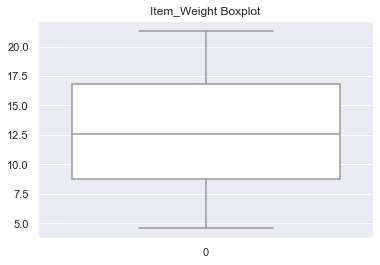

In [14]:
sns.boxplot(data=train_df['Item_Weight'],orient ="v", color = 'w')
plt.title("Item_Weight Boxplot")

Text(0.5, 1.0, 'Item_MRP Boxplot')

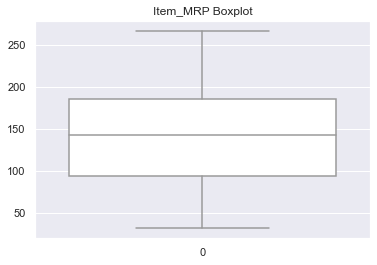

In [15]:
sns.boxplot(data=train_df['Item_MRP'], color = 'w')
plt.title("Item_MRP Boxplot")

In [16]:
#train
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].dropna().mean())

#test
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].dropna().mean())

#checking
train_df['Item_Weight'].isnull().sum(),test_df['Item_Weight'].isnull().sum()



(0, 0)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:

cat = train_df.select_dtypes('object').columns.to_list()
BM_cat = train_df[cat]

In [19]:
BM_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [20]:
[train_df[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64, Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64, OUT027    935
 OUT013    932
 OUT046    930
 OUT049    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64, Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64, Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dty

In [21]:
#train
train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)
#test
test_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)


In [22]:
#check result
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engineering

In [24]:
#creating our new column for both datasets
train_df['Outlet_Age'], test_df['Outlet_Age']= train_df['Outlet_Establishment_Year'].apply(lambda year: 2023 - year), test_df['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)

In [25]:
train_df[['Outlet_Age']]

,Outlet_Age
0,24
1,14
2,24
3,25
4,36
...,...
8518,36
8519,21
8520,19
8521,14


## Moments

In [26]:
sales_mean = np.mean(train_df['Item_Outlet_Sales'])
sales_variance = np.var(train_df['Item_Outlet_Sales'])
sales_std_deviation = np.std(train_df['Item_Outlet_Sales'])
from scipy.stats import skew
from scipy.stats import kurtosis
sales_skew = skew(train_df['Item_Outlet_Sales'], axis=0, bias=True)
sales_kurtosis = kurtosis(train_df['Item_Outlet_Sales'], axis=0, bias=True)

In [27]:
print("Mean Sales:", sales_mean)
print("Variance of Sales:", sales_variance)
print("Standard Deviation of Sales:", sales_std_deviation)
print("Skewness of Sales:", sales_skew)
print("Kurtosis of Sales:",sales_kurtosis)


Mean Sales: 2181.2889135750365
Variance of Sales: 2911799.2582300343
Standard Deviation of Sales: 1706.3995013565946
Skewness of Sales: 1.1773233539676373
Kurtosis of Sales: 1.6142249915903424


## Data Visualization

### Univariate Analysis

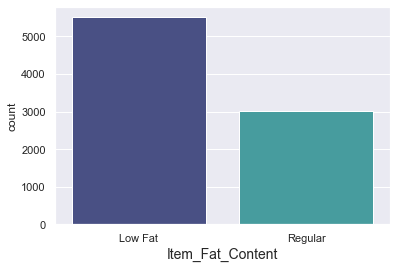

In [28]:
#categorical columns:
#['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
# 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

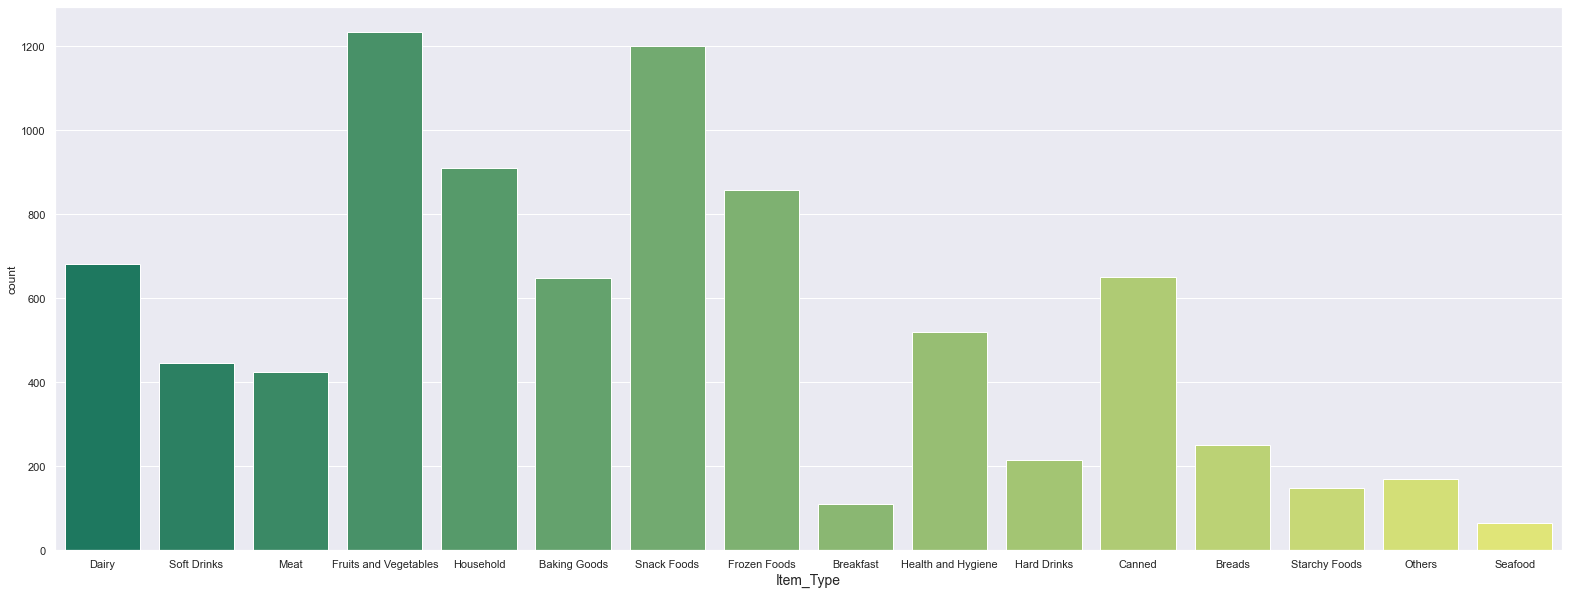

In [29]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()



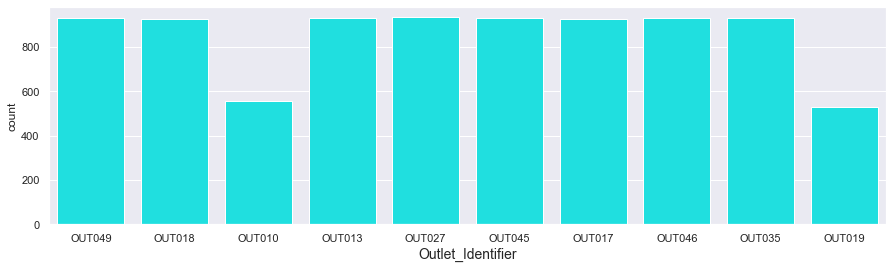

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train_df ,color='cyan')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

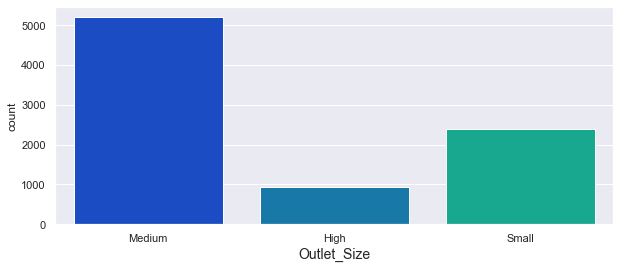

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train_df ,palette='winter')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

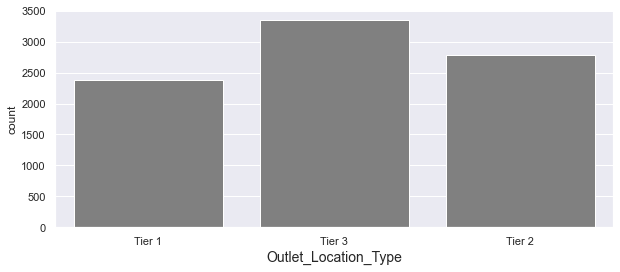

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train_df, color = 'gray')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

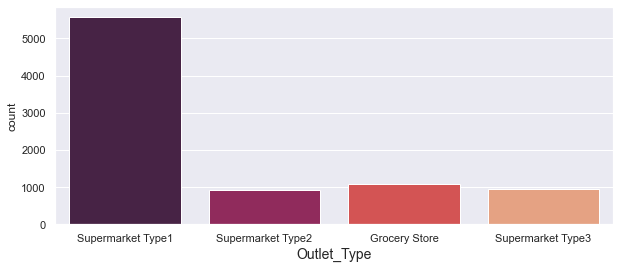

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

In [34]:
#list of all the numeric columns
num = train_df.select_dtypes('number').columns.to_list()
BM_num =  train_df[num]

In [35]:
BM_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
0,9.300,0.016047,249.8092,1999,3735.1380,24
1,5.920,0.019278,48.2692,2009,443.4228,14
2,17.500,0.016760,141.6180,1999,2097.2700,24
3,19.200,0.000000,182.0950,1998,732.3800,25
4,8.930,0.000000,53.8614,1987,994.7052,36
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,36
8519,8.380,0.046982,108.1570,2002,549.2850,21
8520,10.600,0.035186,85.1224,2004,1193.1136,19
8521,7.210,0.145221,103.1332,2009,1845.5976,14


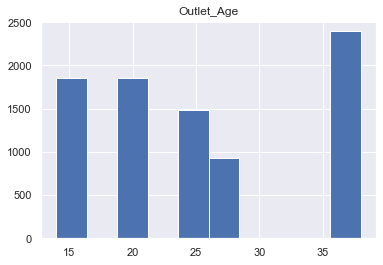

In [36]:
plt.hist(train_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

### UNIVARIATE ANALYSIS- SUMMARY
    Item_Fat_Content - Most items sold are low fat.
    Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.
    Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are                                        significanly lower.
    Outlet_Size - Bigmart outlets are mostly medium sized in our data.
    Outlet_Location_Type - The most common type is Tier3.
    Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.
    Outlet_Age - The most common outlets are 35 years old.


## Multivariate analysis

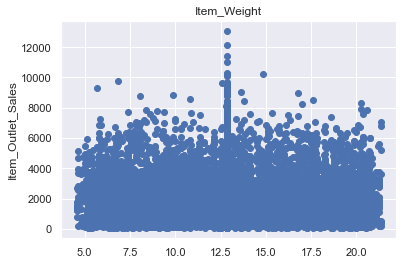

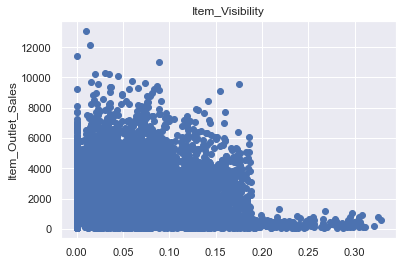

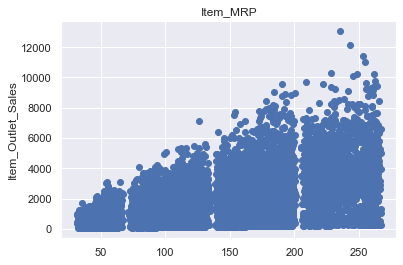

In [37]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

No handles with labels found to put in legend.


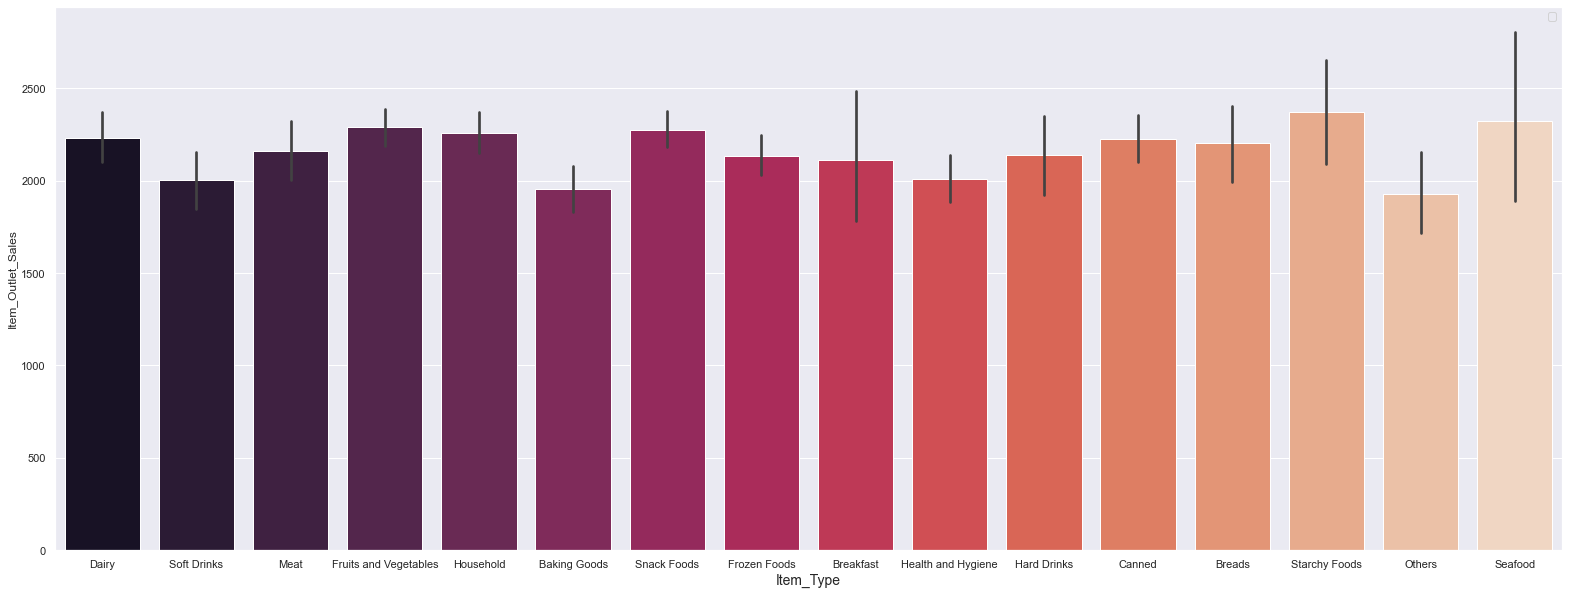

In [38]:
#Multivariate Plots

plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train_df ,palette='rocket')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


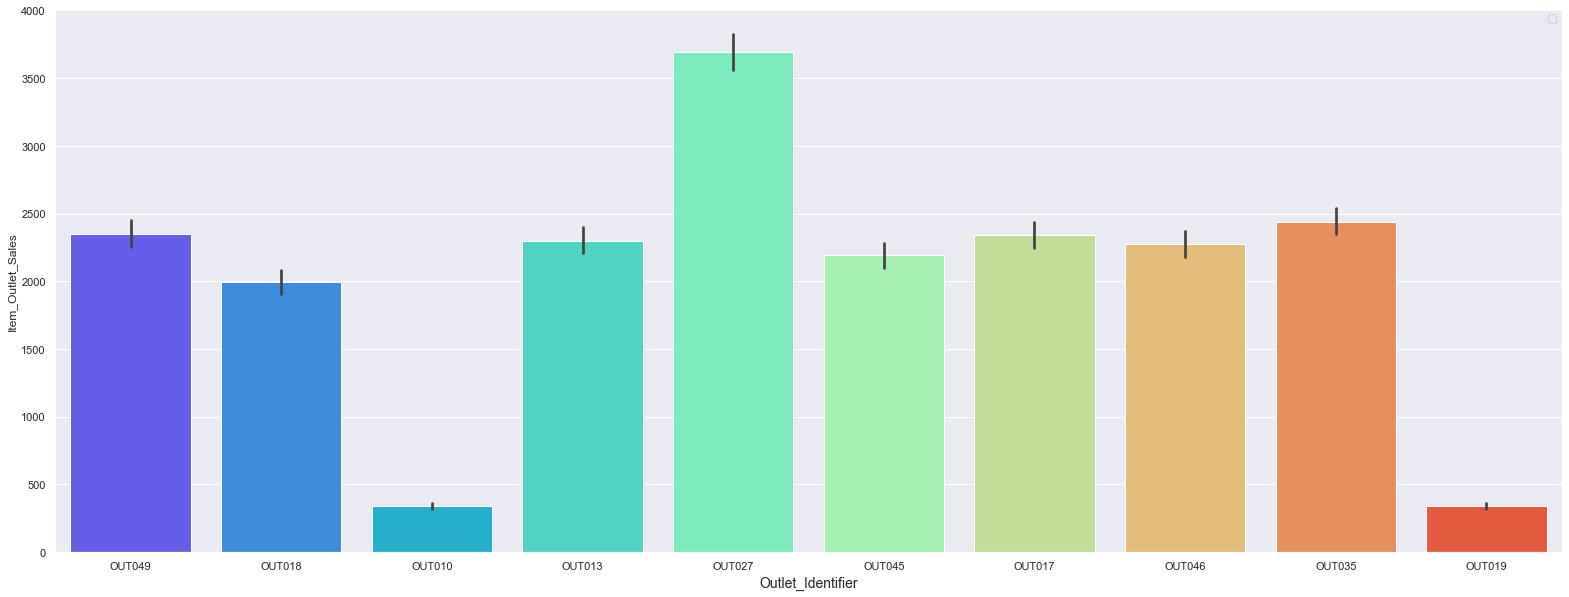

In [39]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train_df ,palette='rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


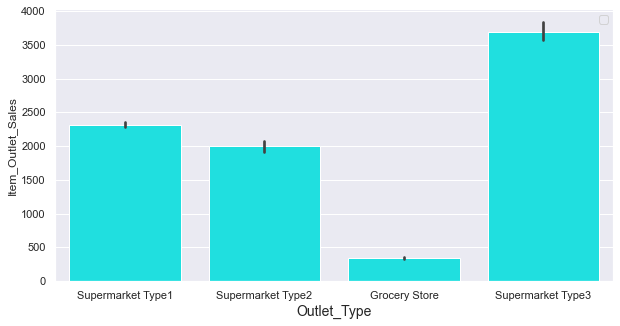

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train_df ,color = 'cyan')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


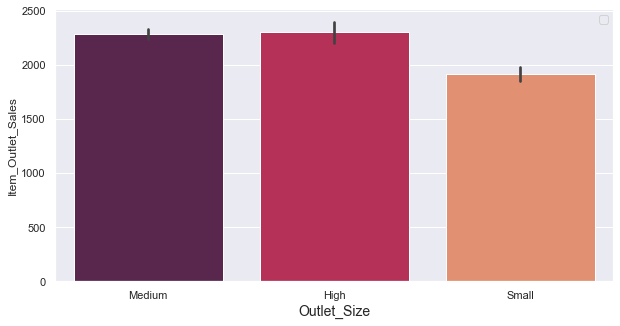

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=train_df ,palette='rocket')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


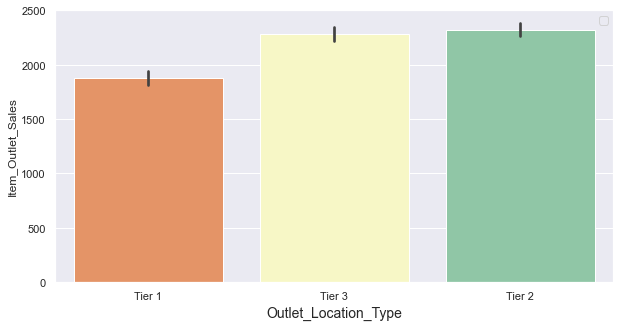

In [42]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train_df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()



In [43]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.049135
Outlet_Age,0.008301,0.074834,-0.005020,-1.000000,0.049135,1.000000


<AxesSubplot:>

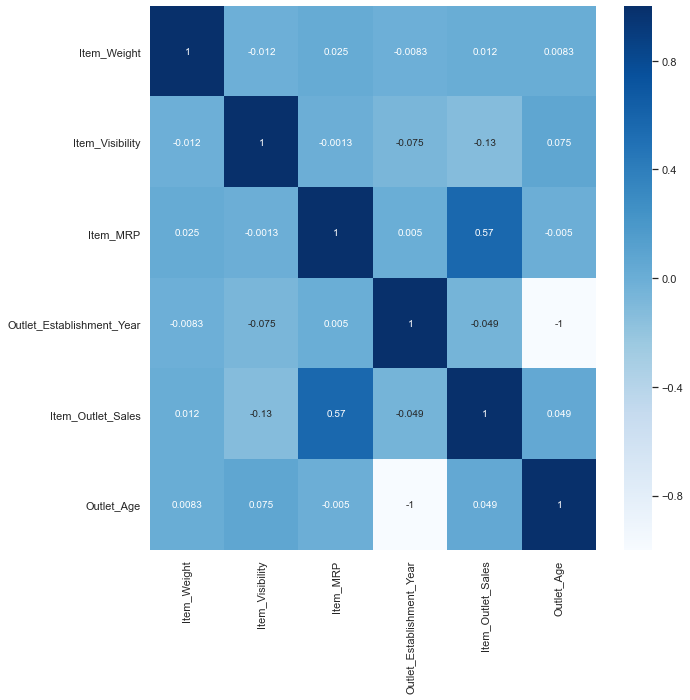

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), cmap='Blues',annot = True)

### MULTIVARIATE ANALYSIS - SUMMARY
Item_Weight is spreaded, no specific pattern.
Item_Visibility Appears to be spreaded as well but some concentration                                                                     around the (0,0)                                                                                                                                indicate small visibility items are not selling well is some cases.
Items with higher MRP tend to sell better in most cases.

The difference in item types by sales is very small.

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

Suprisingly supermarket type 3 is the most profitable and not type 1.

Medium and high outlet sizes are pretty much even in sales.

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

Correlation Matrix - We can see Item_Outlet_Sales is highly correlated with Item_MRP

In [45]:
#Extra Preprocessing
train_df = pd.get_dummies(train_df)

## Model Implementation 

In [46]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = train_df.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model3 = Ridge(alpha=1.0)


In [57]:
# ensemble model using a voting system
ensemble_model = VotingRegressor([('rf', model1), ('gb', model2), ('ridge', model3)])

In [58]:
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('ridge', Ridge())])

In [59]:
# Predictions on the testing set
ensemble_pred = ensemble_model.predict(X_test)

In [60]:
# Evaluate the ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
rmse = np.sqrt(mse)
print('Ensemble Model RMSE:', rmse)

Ensemble Model RMSE: 1066.9454255408452


In [81]:
input_data = list(X.iloc[2])

In [82]:
ensemble_model.predict([input_data])

array([2033.49878189])

In [76]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [87]:
import joblib
joblib.dump(ensemble_model, 'model1.h5')

loaded_model = joblib.load('model1.h5')

In [88]:
from IPython.display import FileLink

# Provide the path to the saved model file
file_path = 'model1.h5'

# Generate a download link for the file
FileLink(file_path)


C:\Users\Hp pc\Downloads\Big_Mart_sales_prediction_project-main\Big_Mart_sales_prediction_project-main\model1.h5